In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

#
CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

Airplanes
Cars
Birds
Cats
Deer
Dogs
Frogs
Horses
Ships
Trucks
The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.
The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
Images have low resolution (32x32).
Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [4]:
import tensorflow as tf

In [5]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [7]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 613s 4us/step


In [9]:
X_train.shape


(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

[1]


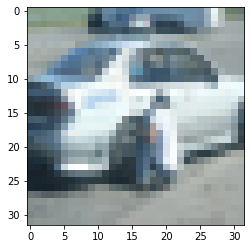

In [17]:
i=30009
plt.imshow(X_train[i])
print(y_train[i])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


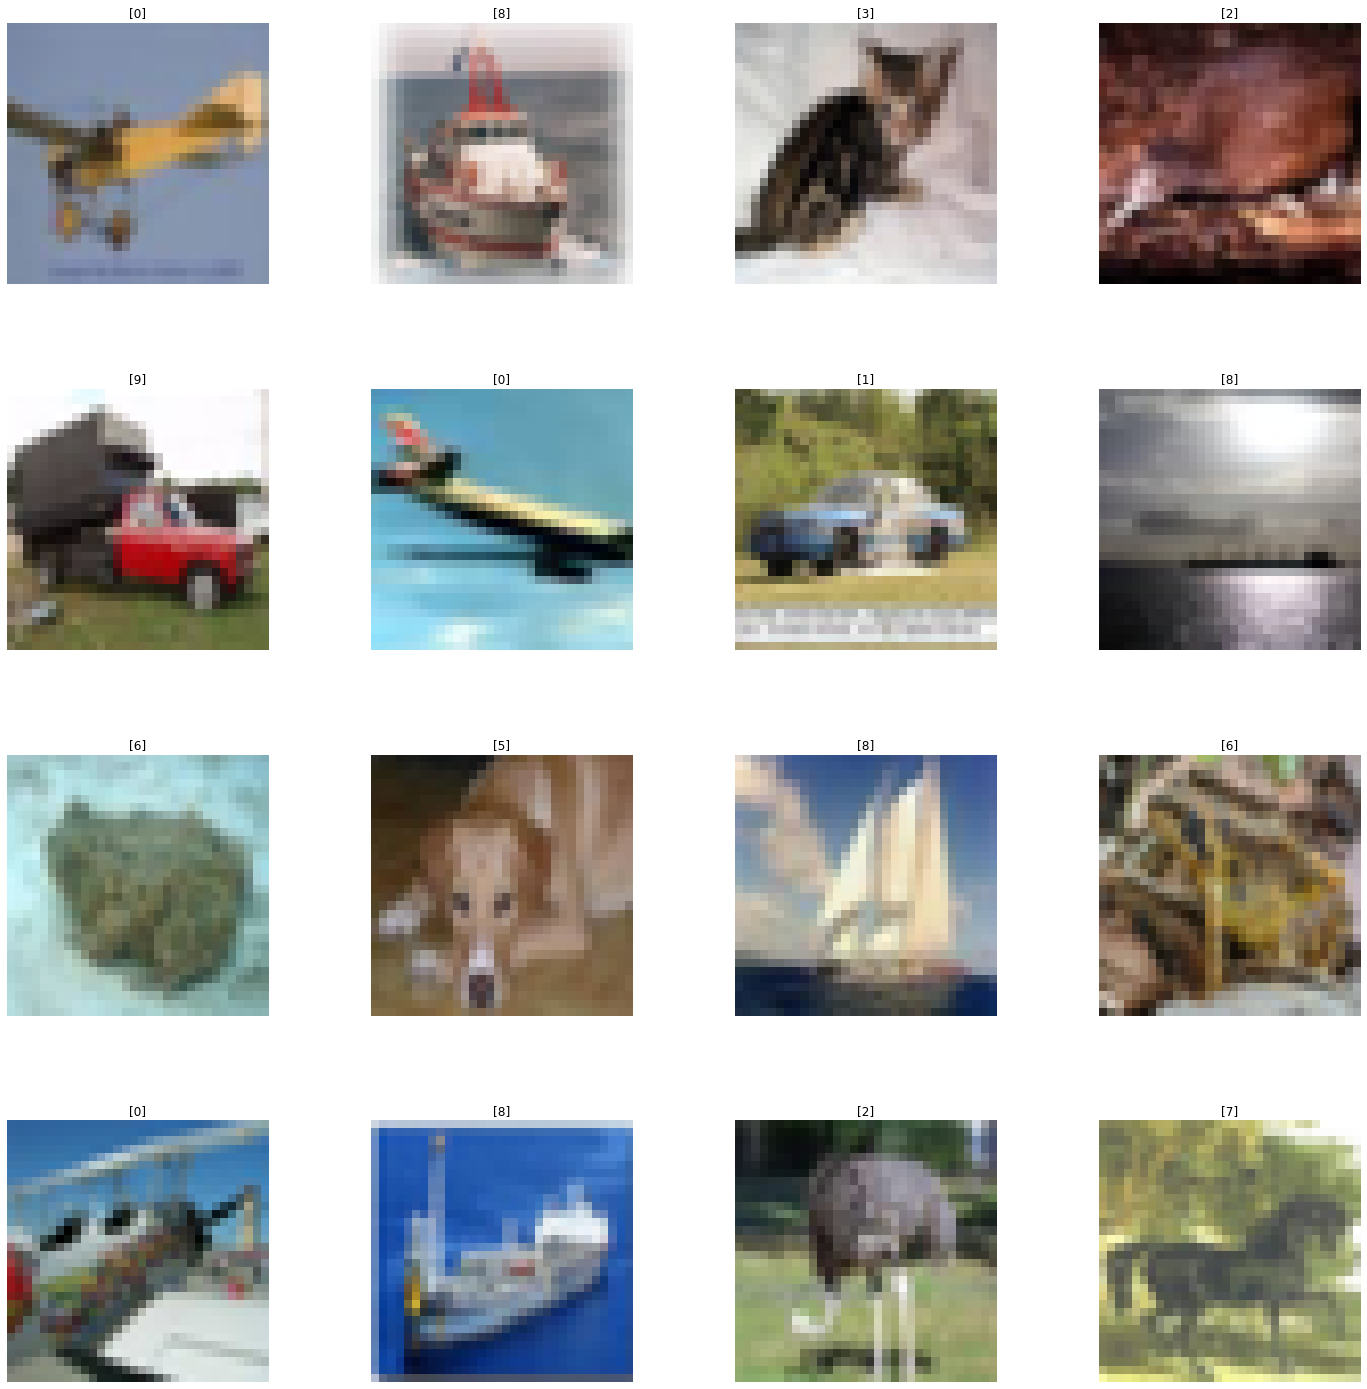

In [25]:
W_grid=4
L_grid=4
fig, axes=plt.subplots(W_grid,L_grid,figsize=(25,25))
axes=axes.ravel()

n_training = len(X_train)
for i in np.arange(0,L_grid*W_grid):
    index= np.random.randint(0,n_training)  #Pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
    
plt.subplots_adjust(hspace=0.4)

In [26]:
n_training

50000

# STEP 3: Data Preparation

In [27]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')


In [28]:
number_cat=10

In [30]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:
import keras

In [32]:
y_train=keras.utils.to_categorical(y_train,number_cat)

In [34]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
X_train=X_train/255
X_test=X_test/255

In [36]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [39]:
Input_shape=X_train.shape[1:]

In [40]:
Input_shape

(32, 32, 3)

# Train the model

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [49]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024,activation='relu'))
cnn_model.add(Dense(units=1024,activation='relu'))
cnn_model.add(Dense(units=10,activation='softmax'))


In [53]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.rmsprop(lr=0.01),metrics=['accuracy'])

In [84]:
x_val= X_train[-10000:]
y_val=y_train[-10000:]
X_train=X_train[:-10000]
y_train=y_train[:-10000]
history=cnn_model.fit(X_train,y_train,batch_size=32,epochs=1,shuffle=True,validation_data=(x_val,y_val))

Train on 30000 samples, validate on 10000 samples
Epoch 1/1
30000/30000 [==============================] - 606s 20ms/step - loss: 2.3037 - accuracy: 0.1010 - val_loss: 2.3063 - val_accuracy: 0.0976


In [85]:
history.history

{'val_loss': [2.3062695037841796],
 'val_accuracy': [0.09759999811649323],
 'loss': [2.3037155151367186],
 'accuracy': [0.10103333]}

In [55]:
# Evaluate the model

In [74]:
'''def eval():
    metrics =cnn_model.evaluate(
        x=X_test,
        y=y_test,
        batch_size=batch_size,
        verbose=1,
        sample_weight=None
    )'''

#eval = cnn_model.evaluate(X_test, y_test,batch_size=batch_size,verbose=1,sample_weight=None)
#print('Test Accuracy: {}'.format(evaluation[1]))

'def eval():\n    metrics =cnn_model.evaluate(\n        x=X_test,\n        y=y_test,\n        batch_size=batch_size,\n        verbose=1,\n        sample_weight=None\n    )'

In [81]:
r=cnn_model.evaluate(X_test,y_test,batch_size=128)
print(r)
#cnn_model.fit(X_test,y_test,validation_data=(X_test,y_test))

ValueError: Error when checking target: expected dense_3 to have shape (10,) but got array with shape (1,)